<img src="./screenshots/cartpole_intro.png" alt="drawing" width="1000"/>

In [1]:
import gym

import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot(frame, rewards):
    clear_output(True)
    plt.figure(figsize=(20, 5))
    plt.subplot(131)
    plt.title("frame %s. reward: %s" % (frame, np.mean(rewards[-10:])))
    plt.plot(rewards)
    plt.show()

### Random Action Policy

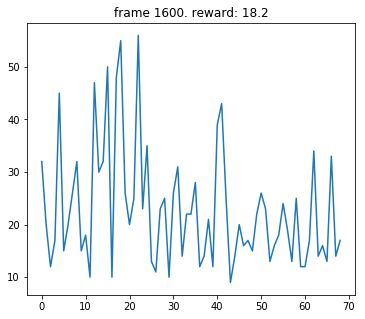

In [ ]:
env = gym.make('CartPole-v0')

all_rewards = []
frame = 0

for i_episode in range(100):
    observation = env.reset()
    episode_reward = 0
    for t in range(100):
        frame += 1
        episode_reward += 1
        env.render()
        #random action taken
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            #print("Episode finished after {} timesteps".format(t+1))
            all_rewards.append(episode_reward)
            break
        if frame % 200 == 0:
            plot(frame, all_rewards)
env.close()

### Rule Based Policy

In [1]:
def get_action(observation):
    cart_position = observation[0]
    cart_velocity = observation[1]
    pole_angle = observation[2]
    pole_velocity_at_tip = observation[3]
    if pole_angle < 0:
        # push cart to left
        return 0
    else:
        # push cart to right
        return 1

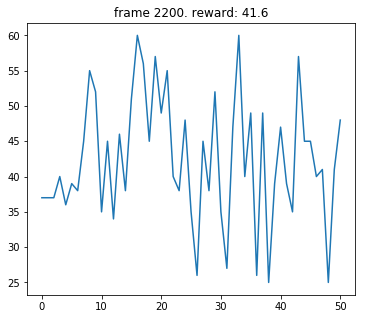

In [ ]:
env = gym.make('CartPole-v0')

all_rewards = []
frame = 0

for i_episode in range(100):
    observation = env.reset()
    episode_reward = 0
    for t in range(100):
        frame += 1
        episode_reward += 1
        env.render()
        #follow our rule
        action = get_action(observation)
        observation, reward, done, info = env.step(action)
        if done:
            #print("Episode finished after {} timesteps".format(t+1))
            all_rewards.append(episode_reward)
            break
        if frame % 200 == 0:
            plot(frame, all_rewards)
env.close()